# Proyecto Módulo 3:Ecuaciones Diferenciales Aplicadas
## Apocalipsis Zombi

### Objetivos
Dicho lo anterior nuestros objetivos son:

**Objetivo General**

- Aplicar un modelo de ecuaciones diferenciales en un tema específico.​



**Objetivos Específicos:**

- Graficar resultados del modelo propuesto​

- Interpretar los resultados mediante la observación de las gráficas, exponiendo conclusiones. 


### Modelo que Representa el Problema 

Dentro de los temas de ciencia ficción, se ha hablado numerosas veces de un “Apocalipsis Zombie” o si es posible que la raza humana sobrevivir a esto. Lo más interesante que realmente existe un modelo matemático respecto a este tema, pues lo describen como un sistema dinámico, de manera similar a como se realiza en ecología, epidemiología, etc. Un modelo de estas características fue realizado por Philip Munz y colaboradores, de la Carleton University y de la Universidad de Ottawa, en un trabajo que lleva por título:
+ When Zombies Attack! Mathematical Modelling of an Outbreak of Zombie Infection 
 

Sistema de apocalipsis zombi (Obtenido de Munz et al. 2009) modelado con el siguiente sistema de ecuaciones de primer orden:

$$
\begin{eqnarray} 
\frac{dS}{dt} = P - BSZ - dS \\
\frac{dZ}{dt} = BSZ + GR - ASZ \\
\frac{dR}{dt} = dS + ASZ - GR 
\end{eqnarray}
$$

Dónde:
+ S: Número de víctimas susceptibles (VIVOS)
+ Z: Número de Zombis
+ R: Número de personas asesinadas
+ P: índice de nacimientos
+ d: Probabilidad de muerte natural
+ B: Probabilidad de que la "enfermedad zombi" sea transmitida en una persona viva
+ G: Probabilidad de que un muerto se convierta en zombi
+ A: Probabilidad de que un zombi sea destruido



### Solución del Problema
Expomdremos tres escenarios posibles para analizar el comportamiento sobrevivencia de los humanos vs apocalipsis zombie.En cada escenario diferente se hara cambio en algunas variables, mientras otras se quedarán igual, estos cambios se podran ver especificados segun la descripción de cada uno. Solo para recordar que la usar multiples condiciones iniciales se estará trabajando con vectores y sus diferentes posiciones segun la variable.


Dicho lo anterior, plantearemos los valores de las condicones iniciales, sin exagerarlas, a posibles valores que presentarían en el inicio de la propagación de la infección. Dónde segun el escenario alunos valores podrían ser estacionarios, mientras que otros se quedarán fijos sobretodo los porcentajes de probabilidad para mantener "justo" el balance de análisis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [2]:
P = 0  #índice de nacimientos    
d = 0.0001  #Probabilidad de muerte natural
B = 0.0095  #Probabilidad de que la "enfermedad zombi" sea transmitida en una persona viva
G = 0.0001  #Probabilidad de que un muerto se convierta en zomb
A = 0.0001  # Probabilidad de que un zombi sea destruido

def f(y, t):#Y es un vector
     Si = y[0]#indican posiciones de variables en X
     Zi = y[1]
     Ri = y[2]
     f0 = P - B*Si*Zi - d*Si
     f1 = B*Si*Zi + G*Ri - A*Si*Zi
     f2 = d*Si + A*Si*Zi - G*Ri
     return np.array( [f0, f1, f2])

### Escenario 1
Al analizar el  sistema de ecuaciones en una escala de tiempo muy corta, en la que no se llegan a producir nacimientos y un tasa muy baja de muertes naturales, sería lo equivalente al inicio de la epidemia, donde solo tenemos potenciales infectados

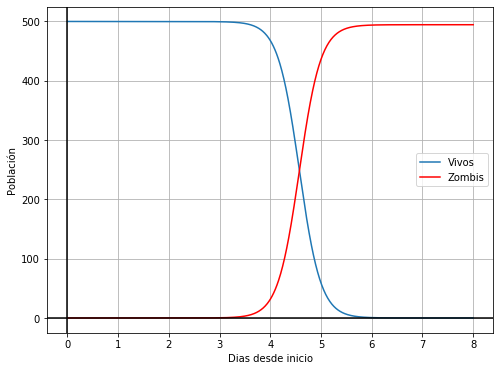

In [9]:
#1
S0 = 500              
Z0 = 0                 
R0 = 0                 
y0 = [S0, Z0, R0] #vector tomando valores declarados anteriormente de condiciones iniciales  
t  = np.linspace(0, 8, 1000)# vector de tiempo , de 0 a 8 con 1000 puntos         

soln = odeint(f, y0, t)#resolver el sistema
S = soln[:, 0]#para S la solución es la primera posicion en vector soln
Z = soln[:, 1]
R = soln[:, 2]

#Grafica
plt.figure(figsize=(8,6))
plt.plot(t, S, label='Vivos')
plt.plot(t, Z, label='Zombis', color='r')
plt.xlabel('Dias desde inicio')
plt.ylabel('Población')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.grid()
plt.show()

## Escenario 2
Otra posibilidad presentada es tener un modelo de infección latente, donde el número de muertes aumenta drásticamente (comparado con el escenario anterior)al verse contagiados los individuos suceptibles y se empieza a convertir en una epidemia.


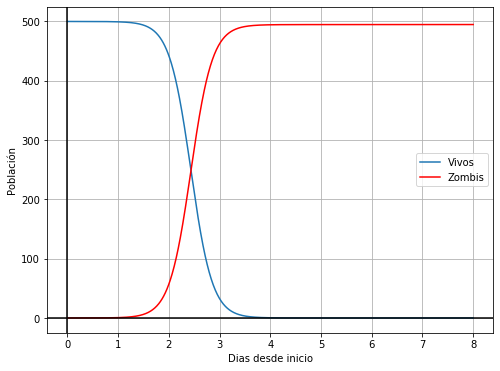

In [4]:
#2
R0 = 0.5*S0  #número de  muertes 
y0 = [S0, Z0, R0]


soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

#Grafica
plt.figure(figsize=(8,6))
plt.plot(t, S, label='Vivos')
plt.plot(t, Z, label='Zombis', color='r')
plt.xlabel('Dias desde inicio')
plt.ylabel('Población')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.grid()
plt.show()

## Escenario 3
El mejor posible para la raza humana, aumentando el índice de nacimientos, disminuyendo el número de muertes y bajando la probabilidad de infección, es decir que con el paso del tiempo se haya descubierto alguna cura. 

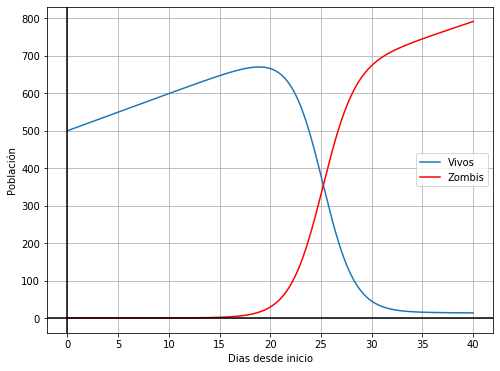

In [12]:
#3
R0 = 0.01*S0   
P  = 10  #Indice de nacimientos
B=0.00095#Probabilidad de infección zombie
y0 = [S0, Z0, R0]
t  = np.linspace(0, 40, 1000)

soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

#Grafica
plt.figure(figsize=(8,6))
plt.plot(t, S, label='Vivos')
plt.plot(t, Z, label='Zombis', color='r')
plt.xlabel('Dias desde inicio')
plt.ylabel('Población')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.grid()
plt.show()

## Conclusiones

De acuerdo a los diferentes escenarios
+ **Primer y segundo escenario :** Ambas gráficas son muy parecidas, el número de la población cae abruptamente a diferencia que el en primero se tarda mas tiempo del tomado, superando su mitad, mientras que en el segundo desde un inicio se ve amenazada.
+ **Tercer escencario**: Quisimos plantear el mejor posible, donde todos los factores negativos se puede decir que disminuyen y le damos a la raza humana una oportunidad mayor de supervivencia, ésta siendo notoria en la primera parte del tiempo. Sin embargo, al igual que el resto de los escenarios ,termina por verse disminuida drásticamente la población mientras que los zombies proliferan y aumenta.

Después de plantear estos caso nos damos cuenta que ambas especies no pueden coexistir.  También que este sistema es una posible descripción; ejemplo a lo que ha sucedido con epidemias que han efectado a la humanidad, solo menos drásticas.


**Referencias:**  
+ C(Octubre 12, 2009).La matemática de [REC]: Análisis de una infección zombi.Obtenido en:https://singularidad.wordpress.com/2009/10/12/la-matematica-de-rec-analisis-de-una-infeccion-zombi/